Elisa Stabilini - Matricola: 28326A

# Analisi dati - NO replay buffer

In questo notebook presento l'analisi dati relativa al training dell'algoritmo di reinforcement learning avvenuto con l'utilizzo di un replay buffer.
Durante il training per ogni step di ogni episodio sono state salvate anche tutte le informazioni relative all'agente e all'ambiente circostante per poter avere un quadro più dettagliato possibile del procedimento di apprendimento.

In [1]:
import gymnasium as gym 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import torch
import tensorflow as tf 
import matplotlib.pyplot as plt
import random
import os
import pickle
import timeit
import datetime
from pathlib import Path

2024-10-27 17:25:27.494060: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 17:25:27.525735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 17:25:27.558665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 17:25:27.568149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 17:25:27.591292: I tensorflow/core/platform/cpu_feature_guar

In [2]:
Data_path = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename = '_20240819_183248'

In [3]:
TrainedDQLearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data')

rewards_file = Data_path + 'rewards' + timename + '.npy'
errors_file = Data_path + 'training_errors' + timename + '.npz'
episode_length_file = Data_path + 'episode_length' + timename + '.npy'
episode_info_file = Data_path + 'episode_info' + timename + '.pkl'

In [4]:
# Load the numpy arrays
rewards = np.load(rewards_file)
episode_lengths = np.load(episode_length_file)

# Load the pickle file
with open(episode_info_file, 'rb') as file:
    episode_info = pickle.load(file)


In [5]:
#check episode_info length (should be the same as the number of episode used for training)
print(len(episode_info))
print(type(episode_info))

1000
<class 'list'>


In [6]:
# Initialize dictionaries to store the data
data = {
    "storm_occurred": [],
    "raw_reward": []
}

# Process the data
for episode in episode_info:
    for key in data.keys():
        if key in episode:
            data[key].append(episode[key])

# Convert lists to numpy arrays
for key in data.keys():
    data[key] = np.array(data[key])

Analysis to do:
1. plot episode length (should be 30 yrs for each episode)
2. plot the different infos for the first episode (to see the evolution of the training process)
3. plot the different infos for a random episode (to see the evolution of the training process)
4. plot all the info values for the complete training (all the values for all episodes of the training)
5. plot mean values of the info variable for all episodes
6. Try to make interactive plot that shows the proceedings of the training
7. plot con barra d'errore
8. verificare che la definizione di errore abbia senso

**NOTE:** all the plots must be saved in an appropriate way:
* plots folder
* same name as the model that has been used for the training


### 1. Episode length and episode rewards analysis

In [13]:
rewards_normalized = (rewards - rewards.min()) / (rewards.max() - rewards.min())

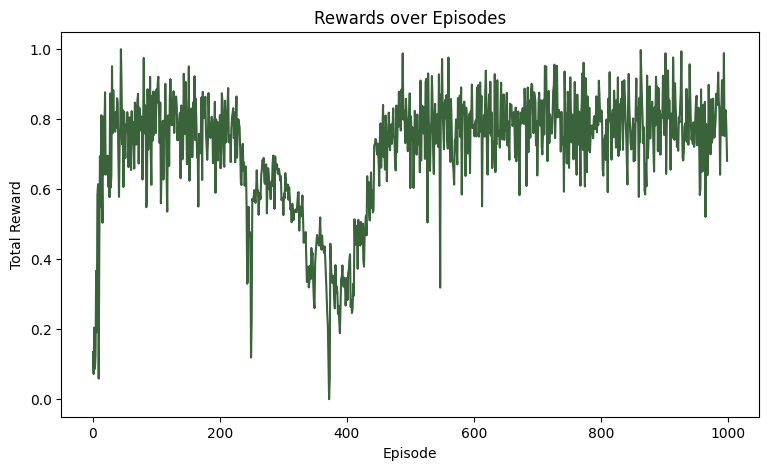

In [14]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_normalized, label='DQN no replay Buffer', color='#3a623b')
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

imagefile = 'rewards' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

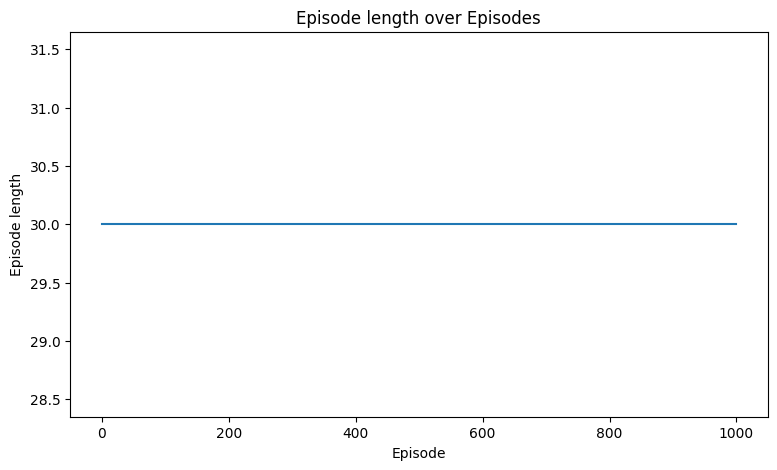

In [8]:
# Plot episode length
plt.figure(figsize=(9, 5))
plt.plot(episode_lengths)
plt.title('Episode length over Episodes')
plt.xlabel('Episode')
plt.ylabel('Episode length')

imagefile = 'ep_length' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### 2. Plot info across episode for the first episode

In [9]:
#analysis episode 0

year = episode_info[0]['year']
raw_reward = episode_info[0]['raw_reward']

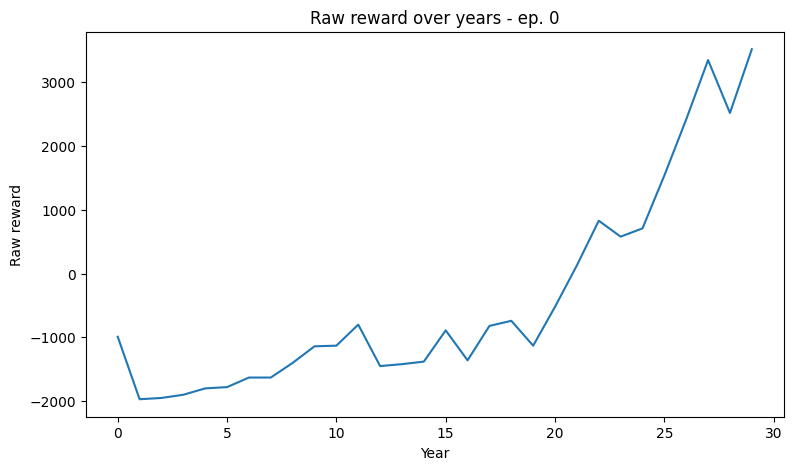

In [10]:
plt.figure(figsize=(9, 5))
plt.plot(raw_reward)
plt.title('Raw reward over years - ep. 0')
plt.xlabel('Year')
plt.ylabel('Raw reward')

imagefile = 'raw_rew_ep0' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### 3. Info across episode for random episode

In [11]:
#analysis episode 0

year = episode_info[50]['year']
raw_reward = episode_info[50]['raw_reward']

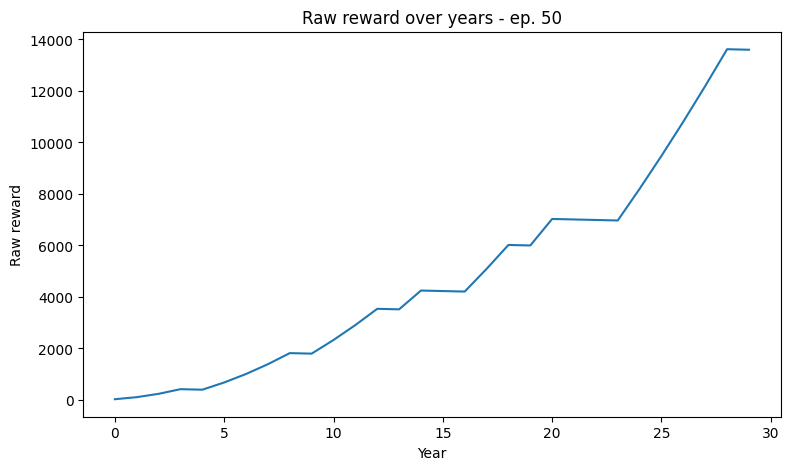

In [12]:
plt.figure(figsize=(9, 5))
plt.plot(raw_reward)
plt.title('Raw reward over years - ep. 50')
plt.xlabel('Year')
plt.ylabel('Raw reward')

imagefile = 'raw_rew_ep50' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### Test access history data

In [13]:
env_history = np.load(os.path.join(TrainedDQLearning_data, f"env_history{timename}.npz"))
budget_history = env_history['budget_history']
sheep_history = env_history['sheep_history']
wheat_history = env_history['wheat_history']

In [14]:
print(len(budget_history))

30000


In [15]:
end_budget = budget_history[29::30]
print(len(end_budget))

1000


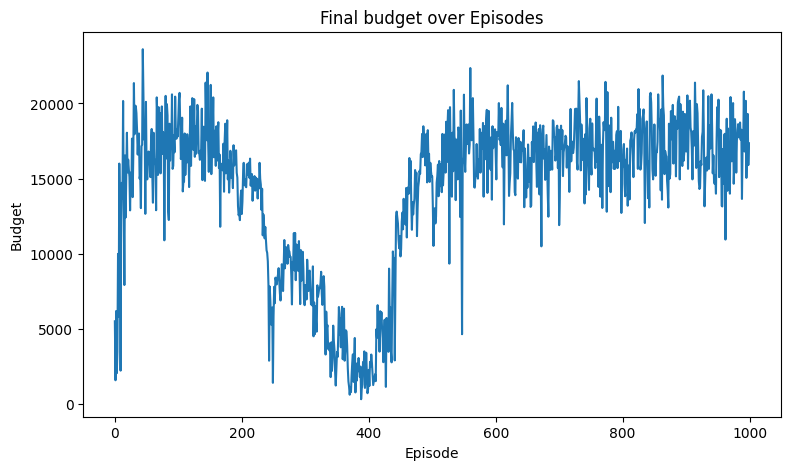

In [16]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(end_budget)
plt.title('Final budget over Episodes')
plt.xlabel('Episode')
plt.ylabel('Budget')

imagefile = 'budget' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

In [20]:
end_sheep = sheep_history[29::30]

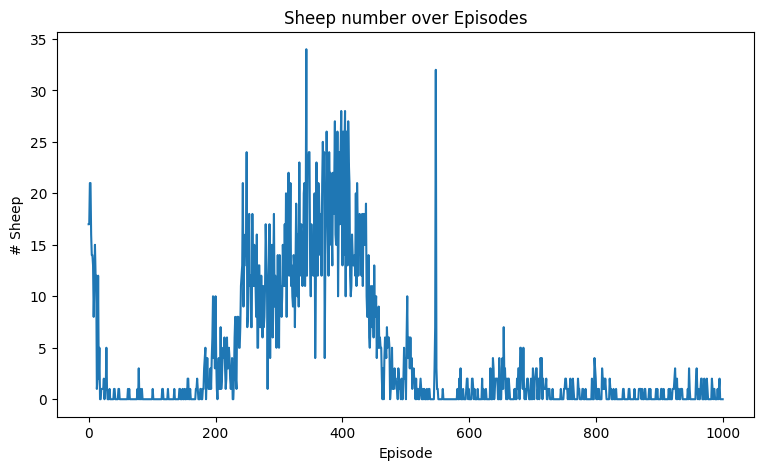

In [21]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(end_sheep)
plt.title('Sheep number over Episodes')
plt.xlabel('Episode')
plt.ylabel('# Sheep')

imagefile = 'sheep' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### 3. Error plot

In [10]:
errors = np.load(errors_file)

avg_error = errors[errors.files[0]]
print(len(avg_error))
all_error = errors[errors.files[1]]
print(len(all_error))

30000
30000


plot errore allo step finale di ciascun episodio

In [11]:
end_error_avg = avg_error[29::30]
end_error = all_error[29::30]
print(len(end_error_avg))
print(len(end_error))

1000
1000


In [15]:
end_error_normalized = (end_error_avg - end_error_avg.min()) / (end_error_avg.max() - end_error_avg.min())

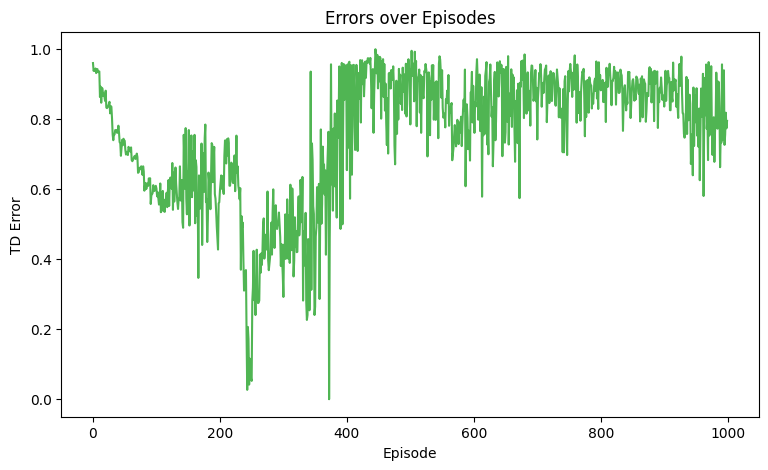

In [16]:
plt.figure(figsize=(9, 5))
plt.plot(end_error_normalized, color='#50B553') 
plt.title('Errors over Episodes')
plt.xlabel('Episode')
plt.ylabel('TD Error')

imagefile = 'errors' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()